Shantusha Ramsoebhag

23-12-2022

# Weekly assignment 4 & 5

## Introduction 

I choose for the dataset Employee attrition, because I'm interested in the correlation of variables and the predicted model that comes out of the variables in the field of work. The variables that I will use are:
- Attrition
- Age                 
- Department
- Education
- TotalWorkingYears
- YearsAtCompany
- MonthlyIncome             

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import normalize 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('Employee_attrition.csv') 
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## Cleaning

In [4]:
# Checking if there are any NaN values in the dataframe
# df.isnull().values.any()

# dropping NaN values
df = df.dropna()
# Clean the data by subsetting the values of the variables
# Eliminate all employees younger than 20
df = df.loc[df['Age'] > 20]

# Selecting only the Female for this project
df = df[df['Gender'] == 'Female']
df



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,...,4,80,0,10,3,3,9,5,0,8
15,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,...,3,80,1,10,1,3,10,9,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,40,No,Travel_Rarely,1194,Research & Development,2,4,Medical,1,2051,...,2,80,3,20,2,3,5,3,0,2
1458,35,No,Travel_Rarely,287,Research & Development,1,4,Life Sciences,1,2052,...,4,80,1,4,5,3,4,3,1,1
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6


In [5]:
# Making a selection from the whole dataset
df = df[['Age', 'Attrition', 'Department', 'Education', 'TotalWorkingYears', 'YearsAtCompany', 'MonthlyIncome']]
df

,Age,Attrition,Department,Education,TotalWorkingYears,YearsAtCompany,MonthlyIncome
0,41,Yes,Sales,2,8,6,5993
3,33,No,Research & Development,4,8,8,2909
6,59,No,Research & Development,3,12,1,2670
11,29,No,Research & Development,2,10,9,4193
15,29,No,Research & Development,4,10,10,9980
...,...,...,...,...,...,...,...
1457,40,No,Research & Development,4,20,5,2001
1458,35,No,Research & Development,4,4,4,2977
1460,29,No,Research & Development,4,5,5,3785
1462,39,No,Sales,1,21,20,12031


## Exploratory data analysis

I made a scattermatrix to see the best correlation between variables visualy.

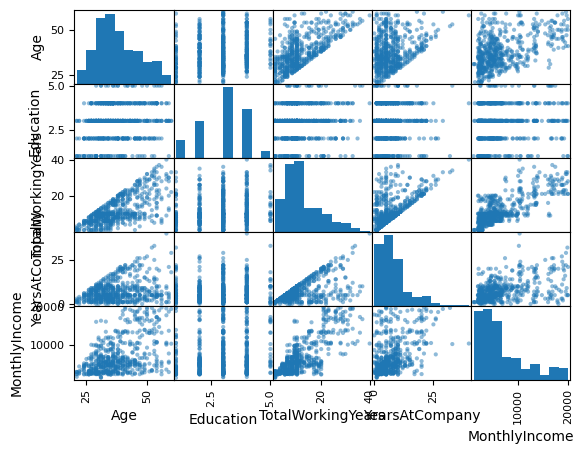

In [6]:
scatter_matrix(df)
plt.show()

To use all variables for further analysis I made dummie variables out of the categorical variables. 

In [9]:
df_cv = df[['Attrition', 'Department']]
df_cv = pd.get_dummies(df_cv)


df_nv = df[['Age', 'Education', 'TotalWorkingYears', 'YearsAtCompany', 'MonthlyIncome']]
df_pm = pd.concat([df_cv, df_nv], axis=1)
df_pm 

,Attrition_No,Attrition_Yes,Department_Human Resources,Department_Research & Development,Department_Sales,Age,Education,TotalWorkingYears,YearsAtCompany,MonthlyIncome
0,0,1,0,0,1,41,2,8,6,5993
3,1,0,0,1,0,33,4,8,8,2909
6,1,0,0,1,0,59,3,12,1,2670
11,1,0,0,1,0,29,2,10,9,4193
15,1,0,0,1,0,29,4,10,10,9980
...,...,...,...,...,...,...,...,...,...,...
1457,1,0,0,1,0,40,4,20,5,2001
1458,1,0,0,1,0,35,4,4,4,2977
1460,1,0,0,1,0,29,4,5,5,3785
1462,1,0,0,0,1,39,1,21,20,12031


In [10]:
corr = df_pm.corr()
corr.style.background_gradient(cmap='coolwarm')

,Attrition_No,Attrition_Yes,Department_Human Resources,Department_Research & Development,Department_Sales,Age,Education,TotalWorkingYears,YearsAtCompany,MonthlyIncome
Attrition_No,1.000000,-1.000000,-0.088122,0.123176,-0.091694,0.182696,0.055970,0.159193,0.069691,0.154841
Attrition_Yes,-1.000000,1.000000,0.088122,-0.123176,0.091694,-0.182696,-0.055970,-0.159193,-0.069691,-0.154841
Department_Human Resources,-0.088122,0.088122,1.000000,-0.256862,-0.129986,-0.002632,0.020506,-0.014285,-0.066229,0.018896
Department_Research & Development,0.123176,-0.123176,-0.256862,1.000000,-0.924860,-0.002033,0.017914,0.020854,0.012485,-0.055067
Department_Sales,-0.091694,0.091694,-0.129986,-0.924860,1.000000,0.003121,-0.026448,-0.015774,0.013253,0.049059
Age,0.182696,-0.182696,-0.002632,-0.002033,0.003121,1.000000,0.176675,0.687004,0.270243,0.487058
Education,0.055970,-0.055970,0.020506,0.017914,-0.026448,0.176675,1.000000,0.141067,0.033971,0.106573
TotalWorkingYears,0.159193,-0.159193,-0.014285,0.020854,-0.015774,0.687004,0.141067,1.000000,0.592334,0.754645
YearsAtCompany,0.069691,-0.069691,-0.066229,0.012485,0.013253,0.270243,0.033971,0.592334,1.000000,0.458849
MonthlyIncome,0.154841,-0.154841,0.018896,-0.055067,0.049059,0.487058,0.106573,0.754645,0.458849,1.000000


From the scatterplot matrix and correlation map we can say that age and montly income and montly income and years at company most correlates with each other. The TotalWorkingYears has one of the highest correlation of the matrix with YearsAtCompany and MonthlyIncome

- Age <> MonthlyIncome
- MonthlyIncome <> YearsAtCompany
- TotalWorkingYears <> YearsAtCompany
- TotalWorkingYears <> MonthlyIncome

In [11]:
df_pm['Attrition_Yes'].value_counts()

0    494
1     80
Name: Attrition_Yes, dtype: int64

We can see that there are 494 attrition with no and 80 attrition with yes

## Predictive model

I choose the k-nearest neighbor to see how well the algorithm will predict the amount of attritions based on the variables. 

The k-nearest neighbor is an algorithm that will predict the value of an variables based on the points nearest to the prediction point. 

I'm going to split the data into a training and test set. 

In [15]:
X = df_pm[['Age', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears']] #create the X matrix
X = normalize(X) #normalize the matrix to put everything on the same scale
y = df_pm['Attrition_Yes'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Evaluation

Calculating the accuracy

In [16]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=5) 
knn = knn.fit(X_train, y_train) 
knn.score(X_test, y_test) 

0.861271676300578

86% of the attrition_yes is predicted accurately. 

In [17]:
y_test_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred) 
cm

array([[149,   3],
       [ 21,   0]], dtype=int64)

In [19]:
knn.classes_

array([0, 1], dtype=uint8)

In [20]:
conf_matrix = pd.DataFrame(cm, index=['attrition no(a)', 'attrition yes(a)'], columns = ['attrition no(p)', 'attrition yes(p)']) 
conf_matrix

,attrition no(p),attrition yes(p)
attrition no(a),149,3
attrition yes(a),21,0


We can see from the confusion matrix that of the attrition no, 149 are correctly predicted as attrition no. 3 are predicted as attrition yes. From the actual attrition yes 21 is predicted as attrition no and 0 is predicted as attrition yes. So the attrition yes is poorly predicted, because the actual attrition yes has a total of 80 and 0 is predicted by this matrix. The attrition no is also not predicted well, because it's actual total is 494 and 149 is correctly predicted. 

### Accuracy check

I calculated the accuracy before with the .score method and now I checked it with the actual calculation. The two values are exactly the same, so it's correct. 86% of the attrition yes is correctly predicted.

In [21]:
(149+0)/(149+21+3+0)

0.861271676300578

#### Precision (attrition yes)

In [ ]:
0/(3+0)

0% of the predicted attrition yes is actual attrition yes. The accuracy score was better predicted than this.

#### Precision (attrition no)

In [24]:
21/(149+21)

0.12352941176470589

12,4% of the predicted no attrition is actually no attrition. That's a very poor prediction if the actual amount of no attrition is 494

#### Recall (survived)

In [23]:
0/(21+0)

0.0

0% of the attrition yes is predicted as attrition yes. This is the same as the precision outcome. The prediction for attrition yes are very bad predicted, except for the accuracy score. 

In [25]:
149/(149+3)

0.9802631578947368

98% of the actual attrition no is predicted as attrition no. 

## Conclusion

Based on the algorithm the actual attrition no is predicted better than the attrition yes for females above the 20 years. 